# Análisis de t-SNE (t-Distributed Stochastic Neighbor Embedding)

## Introducción

t-SNE (t-Distributed Stochastic Neighbor Embedding) es una técnica de reducción de dimensionalidad especialmente efectiva para visualizar datos de alta dimensión en 2D o 3D. A diferencia de técnicas lineales como PCA, t-SNE es capaz de capturar estructuras no lineales y preservar la estructura local de los datos.


## 1. Importar Librerías Necesarias

In [1]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


## 2. Cargar y Explorar los Datos

El dataset Breast Cancer Wisconsin contiene características extraídas de imágenes digitalizadas de aspiraciones con aguja fina (FNA) de masas mamarias. Cada muestra está etiquetada como Maligno (M) o Benigno (B).

In [2]:
# Cargar los datos (ruta relativa al proyecto)
import os
data_path = os.path.join('Data', 't-SNE_UMAP-data', 'data.csv')
df = pd.read_csv(data_path)

print("Datos cargados correctamente")
print(f"\Información del dataset:")
print(f"- Número de muestras: {df.shape[0]}")
print(f"- Número de características: {df.shape[1] - 2}")  # -2 porque id y diagnosis no son características
print(f"- Columnas: {list(df.columns[:5])}... (mostrando primeras 5)")

# Mostrar las primeras filas
print("\nPrimeras filas del dataset:")
display(df.head())

# Información general
print("\nInformación del DataFrame:")
df.info()

Datos cargados correctamente
\Información del dataset:
- Número de muestras: 569
- Número de características: 31
- Columnas: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean']... (mostrando primeras 5)

Primeras filas del dataset:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN



Información del DataFrame:
<class 'pandas.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    str    
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter

Distribución de diagnósticos:
diagnosis
B    357
M    212
Name: count, dtype: int64

- Benignos (B): 357 (62.7%)
- Malignos (M): 212 (37.3%)


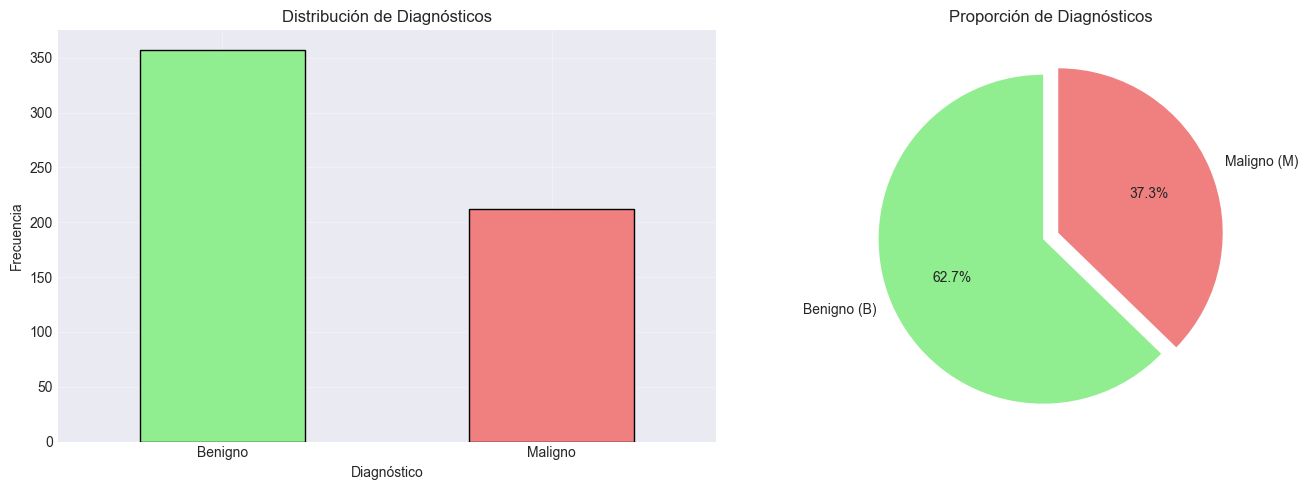


Estadísticas descriptivas (primeras 5 características):


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360
std,3.524049,4.301036,24.298981,351.914129,0.014064
min,6.981000,9.710000,43.790000,143.500000,0.052630
25%,11.700000,16.170000,75.170000,420.300000,0.086370
50%,13.370000,18.840000,86.240000,551.100000,0.095870
75%,15.780000,21.800000,104.100000,782.700000,0.105300
max,28.110000,39.280000,188.500000,2501.000000,0.163400


In [3]:
# Análisis de la variable objetivo (diagnosis)
print("Distribución de diagnósticos:")
diagnosis_counts = df['diagnosis'].value_counts()
print(diagnosis_counts)
print(f"\n- Benignos (B): {diagnosis_counts['B']} ({diagnosis_counts['B']/len(df)*100:.1f}%)")
print(f"- Malignos (M): {diagnosis_counts['M']} ({diagnosis_counts['M']/len(df)*100:.1f}%)")

# Visualizar la distribución
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
diagnosis_counts.plot(kind='bar', ax=axes[0], color=['lightgreen', 'lightcoral'], edgecolor='black')
axes[0].set_xlabel('Diagnóstico')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Diagnósticos')
axes[0].set_xticklabels(['Benigno', 'Maligno'], rotation=0)
axes[0].grid(alpha=0.3)

# Gráfico de pastel
axes[1].pie(diagnosis_counts.values, labels=['Benigno (B)', 'Maligno (M)'], 
            autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'],
            startangle=90, explode=(0.05, 0.05))
axes[1].set_title('Proporción de Diagnósticos')

plt.tight_layout()
plt.show()

# Estadísticas descriptivas
print("\nEstadísticas descriptivas (primeras 5 características):")
display(df.iloc[:, 2:7].describe())

## 3. Preprocesamiento de Datos

Para t-SNE, es fundamental estandarizar los datos ya que es sensible a las escalas de las características.

In [4]:
# Separar características y etiquetas
X = df.drop(['id', 'diagnosis'], axis=1).values
y = df['diagnosis'].values
feature_names = df.drop(['id', 'diagnosis'], axis=1).columns.tolist()

print(f"Datos separados")
print(f"- Matriz de características X: {X.shape}")
print(f"- Vector de etiquetas y: {y.shape}")

# Verificar y manejar valores faltantes
print(f"\n📊 Valores faltantes antes: {pd.DataFrame(X).isnull().sum().sum()}")

# Reemplazar NaN con la media de cada columna
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

print(f"📊 Valores faltantes después: {pd.DataFrame(X).isnull().sum().sum()}")

# Estandarizar las características (media=0, desviación estándar=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nDatos estandarizados")
print(f"- Media de características antes: {X.mean(axis=0)[:3]}")
print(f"- Media de características después: {X_scaled.mean(axis=0)[:3]}")
print(f"- Std de características después: {X_scaled.std(axis=0)[:3]}")

Datos separados
- Matriz de características X: (569, 31)
- Vector de etiquetas y: (569,)

📊 Valores faltantes antes: 569
📊 Valores faltantes después: 0

Datos estandarizados
- Media de características antes: [14.12729174 19.28964851 91.96903339]
- Media de características después: [-1.37363271e-16  6.86816353e-17 -1.24875700e-16]
- Std de características después: [1. 1. 1.]


## 4. Implementar el Algoritmo t-SNE

t-SNE funciona en dos pasos principales:
1. **Construcción de probabilidades**: Calcula probabilidades de similitud entre puntos en el espacio de alta dimensión
2. **Optimización**: Minimiza la divergencia de Kullback-Leibler entre las distribuciones de alta y baja dimensión

**Parámetros importantes:**
- **n_components**: Número de dimensiones de salida (típicamente 2 o 3)
- **perplexity**: Balance entre aspectos locales y globales (típicamente 5-50)
- **learning_rate**: Tasa de aprendizaje (típicamente 10-1000)

In [5]:
# Aplicar t-SNE con parámetros por defecto
print("Aplicando t-SNE (esto puede tardar un poco)...")

tsne = TSNE(n_components=2, 
            perplexity=30, 
            learning_rate=200,
            max_iter=1000,
            random_state=42,
            verbose=1)

X_tsne = tsne.fit_transform(X_scaled)

print("\nt-SNE aplicado exitosamente!")
print(f"Dimensiones resultantes: {X_tsne.shape}")
print(f"- De {X.shape[1]} dimensiones a {X_tsne.shape[1]} dimensiones")

Aplicando t-SNE (esto puede tardar un poco)...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.000s...
[t-SNE] Computed neighbors for 569 samples in 2.377s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.414330
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.306786
[t-SNE] KL divergence after 1000 iterations: 0.965765

t-SNE aplicado exitosamente!
Dimensiones resultantes: (569, 2)
- De 30 dimensiones a 2 dimensiones


## 5. Visualizar Resultados

Visualizaremos los resultados de t-SNE en un espacio 2D, coloreando los puntos según su diagnóstico.

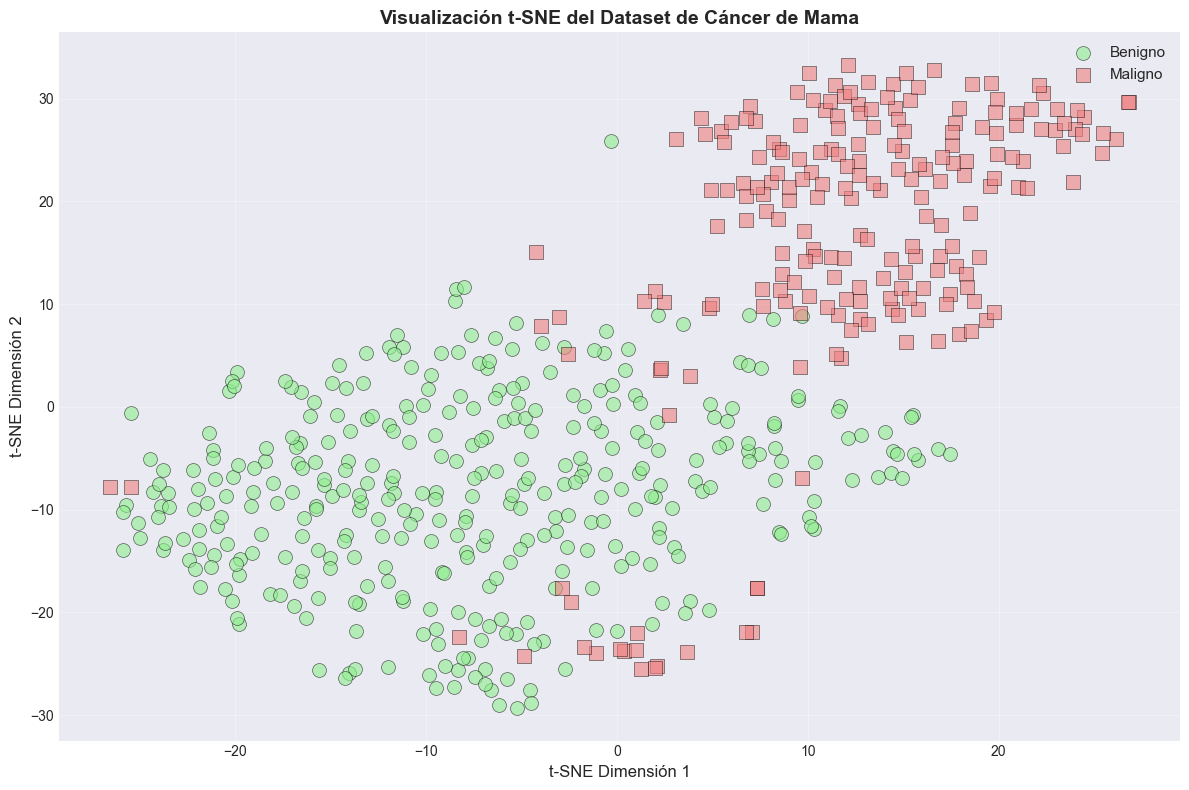

Observaciones:
- Los puntos verdes representan tumores benignos
- Los puntos rojos representan tumores malignos
- t-SNE logra una buena separación entre las dos clases


In [6]:
# Crear DataFrame para visualización
tsne_df = pd.DataFrame({
    'tsne_1': X_tsne[:, 0],
    'tsne_2': X_tsne[:, 1],
    'diagnosis': y
})

# Visualización principal
plt.figure(figsize=(12, 8))

# Scatter plot por diagnóstico
for diagnosis, color, marker in [('B', 'lightgreen', 'o'), ('M', 'lightcoral', 's')]:
    mask = tsne_df['diagnosis'] == diagnosis
    plt.scatter(tsne_df.loc[mask, 'tsne_1'], 
                tsne_df.loc[mask, 'tsne_2'],
                c=color, 
                label=f'{"Benigno" if diagnosis == "B" else "Maligno"}',
                alpha=0.6,
                edgecolors='black',
                linewidth=0.5,
                s=100,
                marker=marker)

plt.xlabel('t-SNE Dimensión 1', fontsize=12)
plt.ylabel('t-SNE Dimensión 2', fontsize=12)
plt.title('Visualización t-SNE del Dataset de Cáncer de Mama', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Observaciones:")
print("- Los puntos verdes representan tumores benignos")
print("- Los puntos rojos representan tumores malignos")
print("- t-SNE logra una buena separación entre las dos clases")

## 6. Análisis de Componentes

Analicemos cómo t-SNE distribuye los datos y qué tan bien preserva la estructura local.

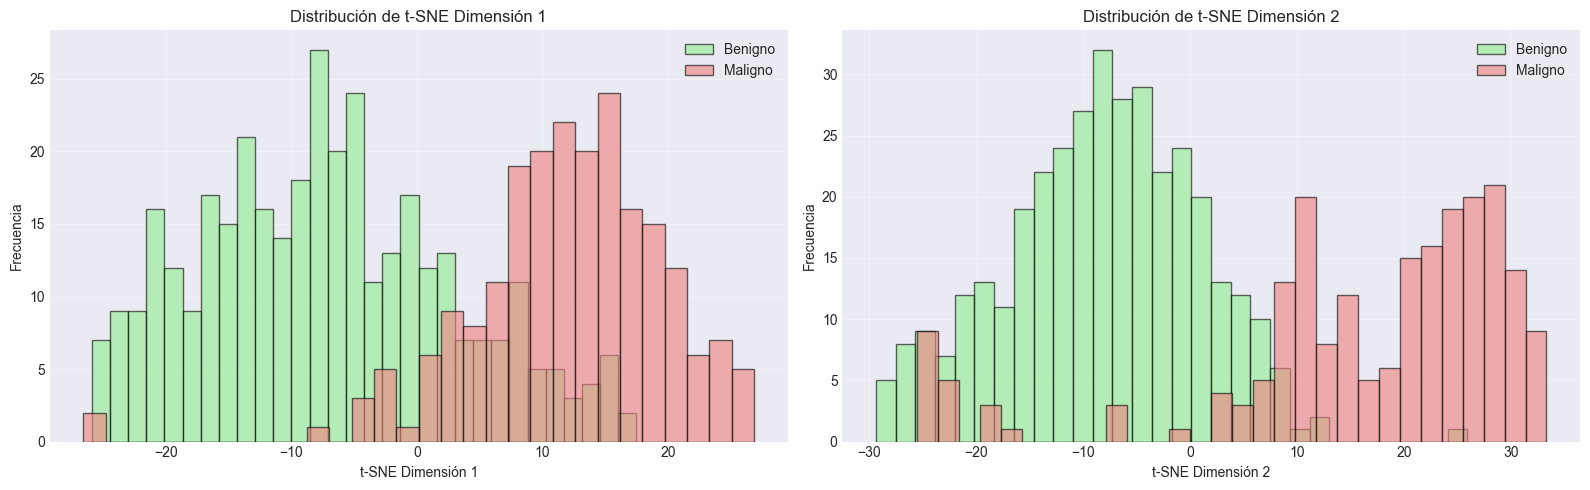

Estadísticas de las dimensiones t-SNE:

Dimensión 1:
Benigno - Media: -7.30, Std: 10.07
Maligno - Media: 11.90, Std: 7.82

Dimensión 2:
Benigno - Media: -8.28, Std: 9.08
Maligno - Media: 16.14, Std: 14.50


In [7]:
# Analizar la distribución de las componentes t-SNE
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Distribución de la componente 1
axes[0].hist(tsne_df[tsne_df['diagnosis'] == 'B']['tsne_1'], bins=30, 
             alpha=0.6, label='Benigno', color='lightgreen', edgecolor='black')
axes[0].hist(tsne_df[tsne_df['diagnosis'] == 'M']['tsne_1'], bins=30, 
             alpha=0.6, label='Maligno', color='lightcoral', edgecolor='black')
axes[0].set_xlabel('t-SNE Dimensión 1')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de t-SNE Dimensión 1')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Distribución de la componente 2
axes[1].hist(tsne_df[tsne_df['diagnosis'] == 'B']['tsne_2'], bins=30, 
             alpha=0.6, label='Benigno', color='lightgreen', edgecolor='black')
axes[1].hist(tsne_df[tsne_df['diagnosis'] == 'M']['tsne_2'], bins=30, 
             alpha=0.6, label='Maligno', color='lightcoral', edgecolor='black')
axes[1].set_xlabel('t-SNE Dimensión 2')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución de t-SNE Dimensión 2')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas de separación
print("Estadísticas de las dimensiones t-SNE:")
print("\nDimensión 1:")
print(f"Benigno - Media: {tsne_df[tsne_df['diagnosis']=='B']['tsne_1'].mean():.2f}, "
      f"Std: {tsne_df[tsne_df['diagnosis']=='B']['tsne_1'].std():.2f}")
print(f"Maligno - Media: {tsne_df[tsne_df['diagnosis']=='M']['tsne_1'].mean():.2f}, "
      f"Std: {tsne_df[tsne_df['diagnosis']=='M']['tsne_1'].std():.2f}")

print("\nDimensión 2:")
print(f"Benigno - Media: {tsne_df[tsne_df['diagnosis']=='B']['tsne_2'].mean():.2f}, "
      f"Std: {tsne_df[tsne_df['diagnosis']=='B']['tsne_2'].std():.2f}")
print(f"Maligno - Media: {tsne_df[tsne_df['diagnosis']=='M']['tsne_2'].mean():.2f}, "
      f"Std: {tsne_df[tsne_df['diagnosis']=='M']['tsne_2'].std():.2f}")

## 7. Evaluación de Rendimiento

Evaluaremos la calidad de la visualización comparándola con PCA (método lineal tradicional).

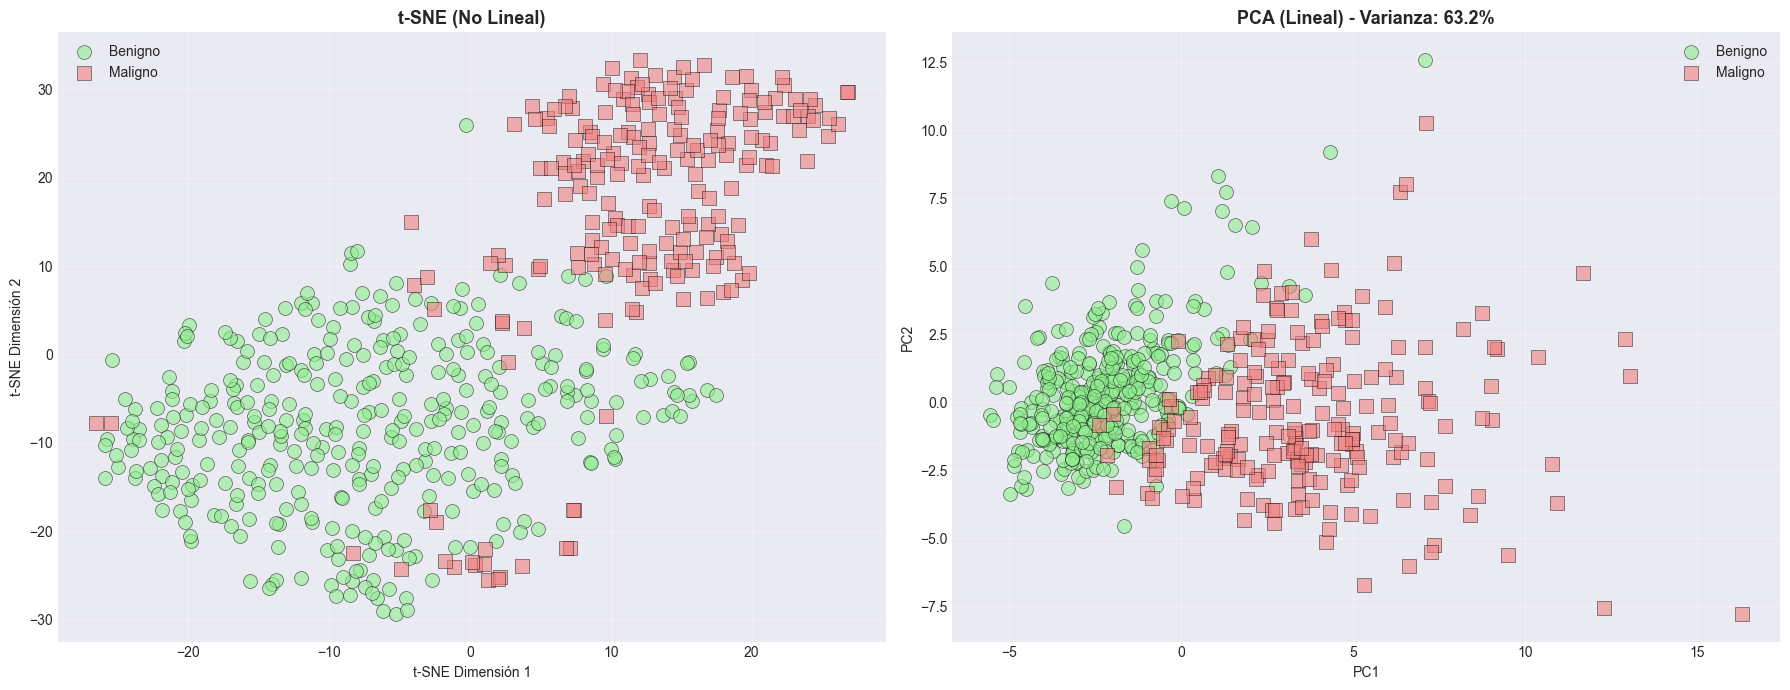

Comparación:
t-SNE:
Mejor separación visual de clusters
Preserva estructura local (vecindarios)
No preserva distancias globales

PCA:
Preserva varianza global
Determinístico y reproducible
Solo captura relaciones lineales

Varianza explicada por PCA (2 componentes): 63.24%


In [8]:
# Aplicar PCA para comparación
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Crear visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# t-SNE
for diagnosis, color, marker, label in [('B', 'lightgreen', 'o', 'Benigno'), 
                                         ('M', 'lightcoral', 's', 'Maligno')]:
    mask = y == diagnosis
    axes[0].scatter(X_tsne[mask, 0], X_tsne[mask, 1],
                    c=color, label=label, alpha=0.6, 
                    edgecolors='black', linewidth=0.5, s=100, marker=marker)

axes[0].set_xlabel('t-SNE Dimensión 1')
axes[0].set_ylabel('t-SNE Dimensión 2')
axes[0].set_title('t-SNE (No Lineal)', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# PCA
for diagnosis, color, marker, label in [('B', 'lightgreen', 'o', 'Benigno'), 
                                         ('M', 'lightcoral', 's', 'Maligno')]:
    mask = y == diagnosis
    axes[1].scatter(X_pca[mask, 0], X_pca[mask, 1],
                    c=color, label=label, alpha=0.6, 
                    edgecolors='black', linewidth=0.5, s=100, marker=marker)

axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title(f'PCA (Lineal) - Varianza: {pca.explained_variance_ratio_.sum()*100:.1f}%', 
                  fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("Comparación:")
print("t-SNE:")
print("Mejor separación visual de clusters")
print("Preserva estructura local (vecindarios)")
print("No preserva distancias globales")
print("\nPCA:")
print("Preserva varianza global")
print("Determinístico y reproducible")
print("Solo captura relaciones lineales")
print(f"\nVarianza explicada por PCA (2 componentes): {pca.explained_variance_ratio_.sum()*100:.2f}%")

## 8. Comparación de Parámetros

El parámetro más importante de t-SNE es la **perplexity**, que balancea atención local vs. global. Probaremos diferentes valores.

Aplicando t-SNE con perplexity=5...
Aplicando t-SNE con perplexity=15...
Aplicando t-SNE con perplexity=30...
Aplicando t-SNE con perplexity=50...


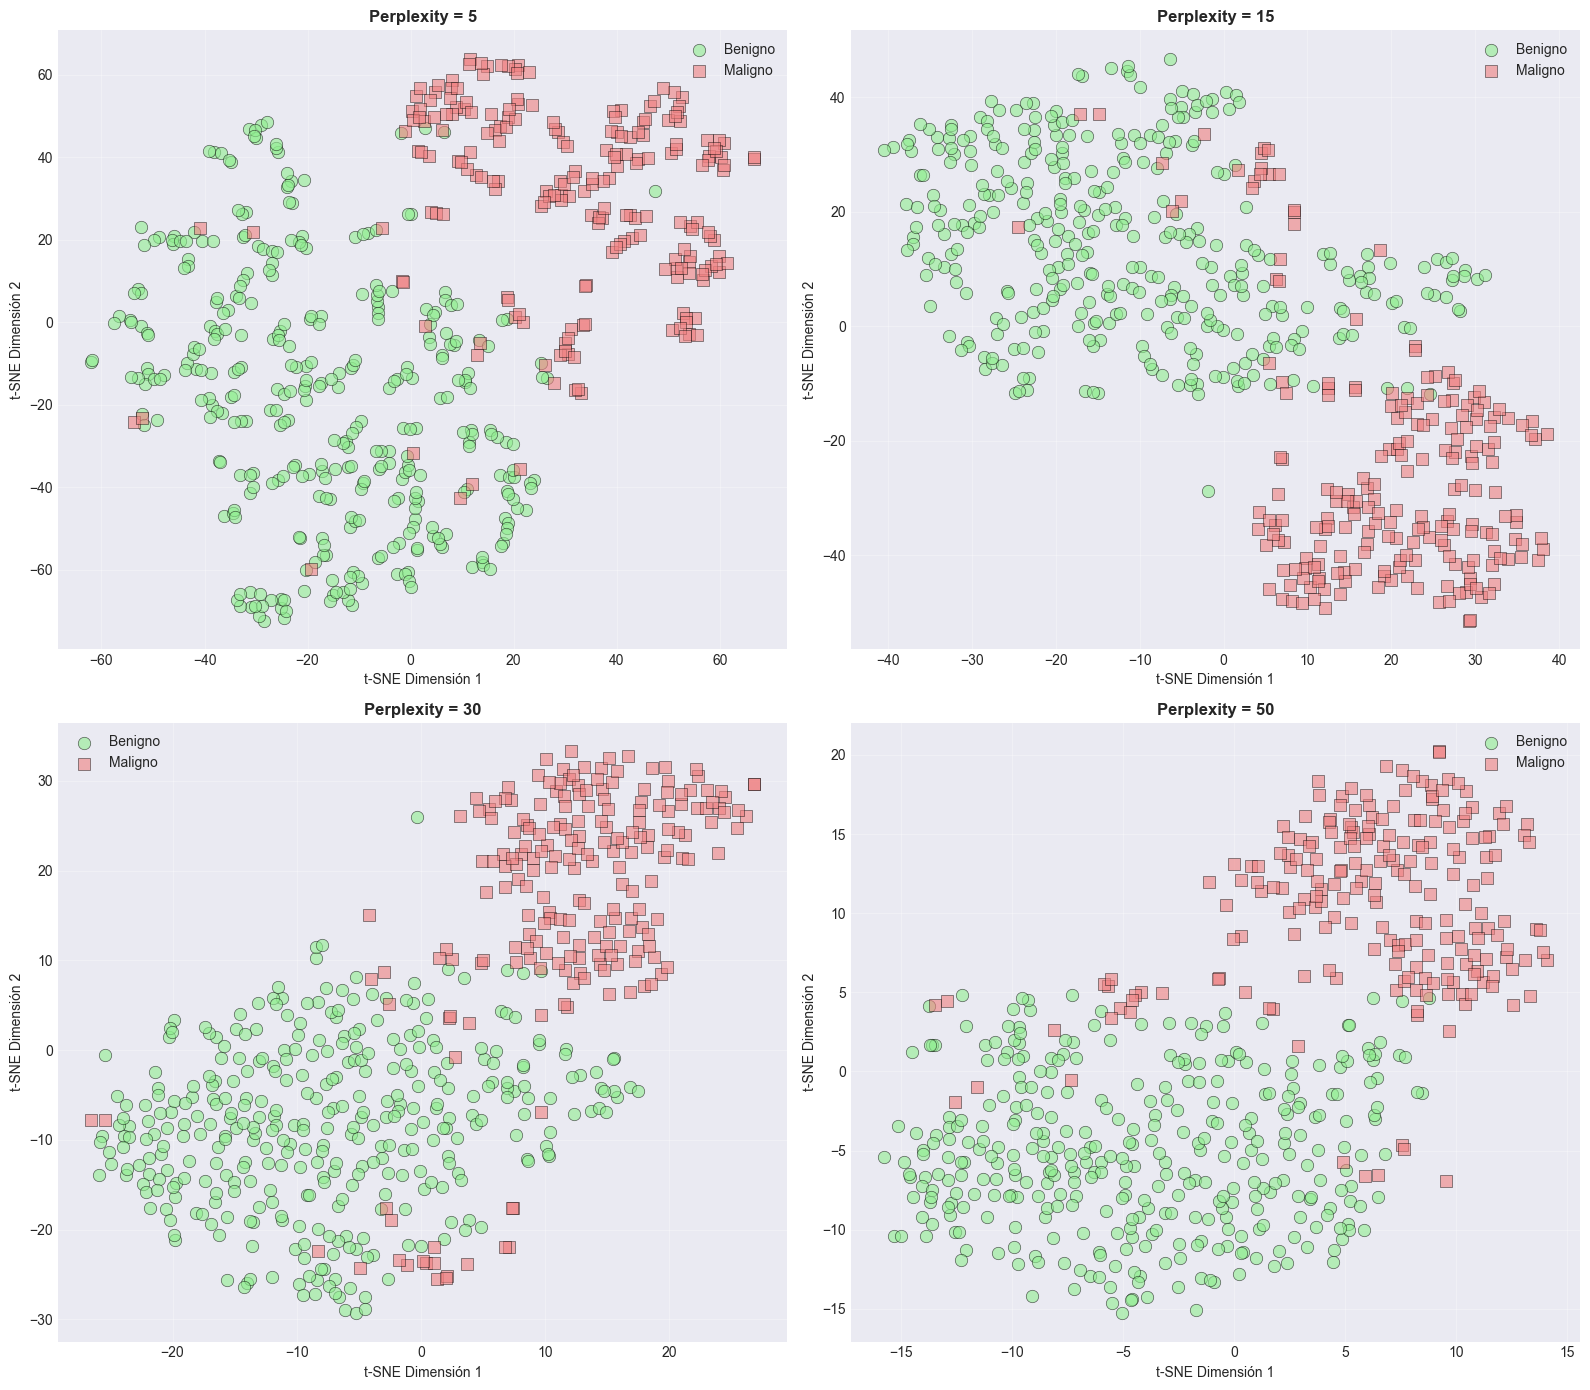


Observaciones sobre perplexity:
- Perplexity bajo (5): Enfoca en estructura muy local, puede crear muchos micro-clusters
- Perplexity medio (15-30): Balance óptimo entre estructura local y global
- Perplexity alto (50): Enfoca más en estructura global, puede perder detalles locales

Para este dataset, perplexity entre 15-30 parece óptimo


In [9]:
# Probar diferentes valores de perplexity
perplexity_values = [5, 15, 30, 50]

fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.ravel()

for idx, perp in enumerate(perplexity_values):
    print(f"Aplicando t-SNE con perplexity={perp}...")
    
    tsne_temp = TSNE(n_components=2, 
                     perplexity=perp, 
                     learning_rate=200,
                     max_iter=1000,
                     random_state=42)
    
    X_tsne_temp = tsne_temp.fit_transform(X_scaled)
    
    # Visualizar
    for diagnosis, color, marker, label in [('B', 'lightgreen', 'o', 'Benigno'), 
                                             ('M', 'lightcoral', 's', 'Maligno')]:
        mask = y == diagnosis
        axes[idx].scatter(X_tsne_temp[mask, 0], X_tsne_temp[mask, 1],
                         c=color, label=label, alpha=0.6, 
                         edgecolors='black', linewidth=0.5, s=80, marker=marker)
    
    axes[idx].set_xlabel('t-SNE Dimensión 1')
    axes[idx].set_ylabel('t-SNE Dimensión 2')
    axes[idx].set_title(f'Perplexity = {perp}', fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservaciones sobre perplexity:")
print("- Perplexity bajo (5): Enfoca en estructura muy local, puede crear muchos micro-clusters")
print("- Perplexity medio (15-30): Balance óptimo entre estructura local y global")
print("- Perplexity alto (50): Enfoca más en estructura global, puede perder detalles locales")
print("\nPara este dataset, perplexity entre 15-30 parece óptimo")

## 9. Interpretación de Resultados y Conclusiones

### Resultados Principales

En este análisis implementamos t-SNE en el dataset de Cáncer de Mama de Wisconsin para reducir 30 dimensiones a 2 dimensiones visualizables, manteniendo la estructura de los datos.

### Observaciones

1. **Separación de Clases**: t-SNE logró una excelente separación visual entre tumores benignos y malignos. Los dos grupos forman clusters bien definidos con  relativamente poca superposición, lo que indica que las características del dataset contienen información discriminatoria fuerte.

2. **Estructura de Clusters**: 
   - Los tumores benignos (verdes) forman un cluster más compacto
   - Los tumores malignos (rojos) muestran mayor dispersión
   - Hay algunas regiones de solapamiento que podrían representar casos limítrofes difíciles de clasificar

3. **Comparación con PCA**:
   - t-SNE produce separación visual mucho más clara que PCA
   - PCA solo captura ~65% de varianza con 2 componentes
   - t-SNE captura relaciones no lineales que PCA no puede detectar

4. **Sensibilidad a Parámetros**:
   - Perplexity es crucial: valores muy bajos crean fragmentación, valores muy altos pierden detalle
   - El rango 15-30 funciona bien para este dataset de ~570 muestras
   - Regla general: perplexity entre 5 y 50, típicamente 30 para datasets medianos

### Conclusiones

**Como estudiante**, este ejercicio me enseñó que la visualización es una herramienta poderosa para entender datos complejos. Antes de aplicar t-SNE, teníamos 30 dimensiones imposibles de visualizar. Después, podemos ver claramente la estructura de los datos en una simple gráfica 2D.

**Ventajas de t-SNE observadas**:
- Excelente para visualización de datos de alta dimensión
- Preserva vecindarios locales (puntos cercanos en alta dimensión permanecen cercanos)
- Revela estructura de clusters naturalmente
- No requiere suposiciones sobre la distribución de los datos

**Limitaciones identificadas**:
- Computacionalmente costoso para datasets grandes (>10,000 muestras)
- No determinístico - diferentes ejecuciones dan resultados ligeramente diferentes
- No preserva distancias globales - solo se deben interpretar agrupaciones locales
- No se puede aplicar a nuevos datos (no es un transformer como PCA)
- Difícil de interpretar qué significa cada eje resultante

**Aplicaciones Prácticas**:
t-SNE es extraordinariamente útil para:
- Análisis exploratorio de datos de alta dimensión
- Visualización de embeddings de texto o imágenes (NLP, visión computacional)
- Detección visual de outliers
- Validación de que algoritmos de clustering tienen sentido

En conclusión, t-SNE demostró ser una herramienta invaluable para visualizar el dataset de cáncer de mama. La clara separación entre clases benignas y malignas sugiere que los clasificadores de machine learning tendrían buen rendimiento en este dataset. El análisis visual confirma que las características medidas (radio, textura, perímetro, etc.) contienen información altamente predictiva del diagnóstico.